In [0]:
!unzip data.zip

In [0]:
!mkdir logs
!mkdir models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
import keras

Using TensorFlow backend.


In [0]:
img_row = 32
img_col = 32
num_channel = 1
epoch = 20
num_classes = 62

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    zca_whitening=True,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
train_generator = datagen.flow_from_directory(
    'data/',
    target_size=(img_row, img_col),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    'data/', # same directory as training data
    target_size=(img_row, img_col),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation') # set as validation data

Found 73853 images belonging to 62 classes.
Found 18461 images belonging to 62 classes.


In [0]:
tensorboard = TensorBoard(log_dir = 'logs/epochs_{}'.format(epoch))

In [0]:
augmented_checkpoint = ModelCheckpoint('models/augmented_best_model.hdf5',
                                       monitor='val_loss',
                                       verbose=1,
                                       save_best_only=True,
                                       mode='auto')

In [7]:
model = Sequential()

model.add(Conv2D(32, (1, 1), strides=(1, 1), activation='relu', input_shape=(img_row, img_col, num_channel)))
model.add(Conv2D(32, (1, 1), strides=(1, 1), activation='relu'))
model.add(Conv2D(32, (1, 1), strides=(1, 1), activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))

model.add(Flatten())
model.add(Dense(num_classes*16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

W0810 17:23:48.741867 140036272195456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 17:23:48.749837 140036272195456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 17:23:48.754750 140036272195456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 17:23:48.791845 140036272195456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0810 17:23:48.801626 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        1056      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
__________

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,  # Better loss function for neural networks
              optimizer=keras.optimizers.Adam(),  # Adam optimizer with 1.0e-4 learning rate
              metrics=['accuracy'])

W0810 17:23:50.103574 140036272195456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = epoch,
    callbacks=[tensorboard, augmented_checkpoint])

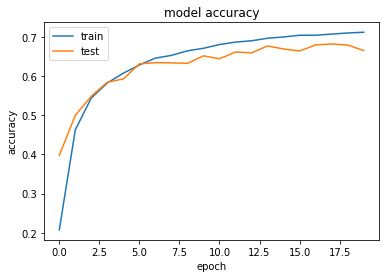

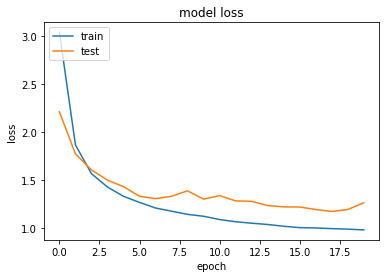

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
predictions = model.predict_generator(validation_generator, steps=18461/32)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
y_pred = np.argmax(predictions, axis=1)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
c_mat = confusion_matrix(validation_generator.classes, y_pred)

In [0]:
target_names = validation_generator.class_indices

In [0]:
cls_report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(cls_report)

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    epochs = 5,
    callbacks=[tensorboard, augmented_checkpoint])